In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("output/processed_gym_members_data.csv")


In [3]:
X = df.drop('Experience_Level', axis=1)  
y = df['Experience_Level']

In [4]:
df.head(10)


,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI,Gender_Male,Workout_Type_HIIT,Workout_Type_Strength,Workout_Type_Yoga
0,56,0.711632,-0.099794,180,157,60,1.283569,1313.0,12.6,3.5,4,3,30.20,True,False,False,True
1,46,0.062843,-1.541869,179,151,66,0.121623,883.0,33.9,2.1,4,2,32.00,False,True,False,False
2,32,-0.266394,-0.500370,167,122,54,-0.444452,677.0,33.4,2.3,4,2,24.71,False,False,False,False
3,25,-0.987808,-0.179909,190,164,56,-1.993713,532.0,28.8,2.1,3,1,18.41,True,False,True,False
4,38,-1.331570,0.541128,188,158,68,-1.844745,556.0,29.2,2.8,3,1,14.39,True,False,True,False
5,56,-0.755406,-0.340140,168,156,74,0.985634,1116.0,15.5,2.7,5,3,20.55,False,True,False,False
6,36,-0.159876,-0.019679,174,169,73,0.687699,1385.0,21.3,2.3,3,2,23.76,True,False,False,False
7,40,-0.188926,-1.702099,189,141,64,0.032243,895.0,30.6,1.9,3,2,30.57,False,False,False,False
8,28,2.328763,1.742857,185,127,52,-0.682800,719.0,28.9,2.6,4,2,32.34,True,False,True,False
9,28,1.365263,0.941704,169,136,64,0.032243,808.0,29.7,2.7,3,1,30.07,True,False,False,False


In [5]:
X

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),BMI,Gender_Male,Workout_Type_HIIT,Workout_Type_Strength,Workout_Type_Yoga
0,56,0.711632,-0.099794,180,157,60,1.283569,1313.0,12.6,3.5,4,30.20,True,False,False,True
1,46,0.062843,-1.541869,179,151,66,0.121623,883.0,33.9,2.1,4,32.00,False,True,False,False
2,32,-0.266394,-0.500370,167,122,54,-0.444452,677.0,33.4,2.3,4,24.71,False,False,False,False
3,25,-0.987808,-0.179909,190,164,56,-1.993713,532.0,28.8,2.1,3,18.41,True,False,True,False
4,38,-1.331570,0.541128,188,158,68,-1.844745,556.0,29.2,2.8,3,14.39,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,24,0.653531,0.140552,187,158,67,0.926047,1364.0,10.0,3.5,4,28.77,True,False,True,False
969,25,-0.339019,-0.900947,184,166,56,0.359971,1260.0,25.0,3.0,2,25.69,True,False,True,False
970,59,-0.639205,0.300782,194,120,53,1.372949,929.0,18.8,2.7,5,19.50,False,False,False,False
971,32,2.556323,0.861589,198,146,62,-0.474246,883.0,28.2,2.1,3,37.74,True,True,False,False


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
dt_model = DecisionTreeClassifier(random_state=42)


In [8]:
dt_model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [9]:
y_pred = dt_model.predict(X_test)


In [10]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

In [11]:
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

Accuracy: 0.85
Precision: 0.85
Recall: 0.85
F1 Score: 0.85

Confusion Matrix:
 [[66 12  0]
 [17 58  0]
 [ 0  0 42]]

Classification Report:
               precision    recall  f1-score   support

           1       0.80      0.85      0.82        78
           2       0.83      0.77      0.80        75
           3       1.00      1.00      1.00        42

    accuracy                           0.85       195
   macro avg       0.87      0.87      0.87       195
weighted avg       0.85      0.85      0.85       195



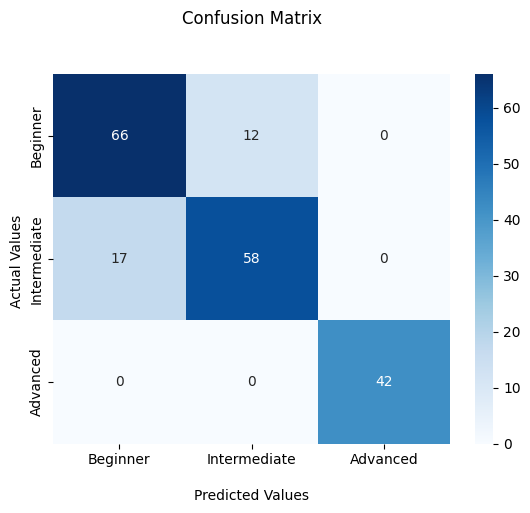

In [12]:
ax = sns.heatmap(conf_matrix, annot=True, cmap='Blues')
ax.set_title('Confusion Matrix' + '\n\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')
ax.xaxis.set_ticklabels(['Beginner', 'Intermediate', 'Advanced'])
ax.yaxis.set_ticklabels(['Beginner', 'Intermediate', 'Advanced'])
plt.show()

In [13]:
comparison_df = pd.DataFrame({
    "Actual": y_test.values, 
    "Predicted": y_pred
})

print(comparison_df.head(10))

   Actual  Predicted
0       2          2
1       3          3
2       1          2
3       1          1
4       3          3
5       3          3
6       2          1
7       2          2
8       2          2
9       1          1


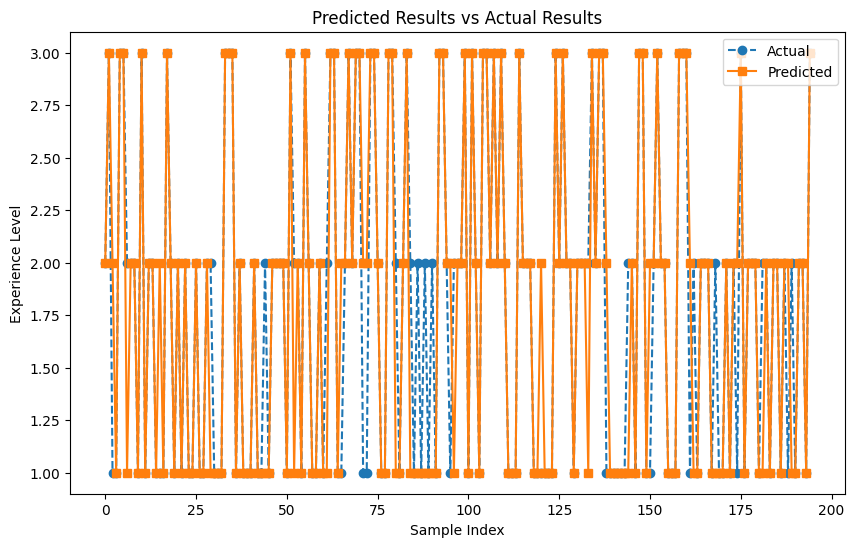

In [14]:
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}).reset_index(drop=True)
plt.figure(figsize=(10, 6))
plt.plot(comparison_df['Actual'], label='Actual', marker='o', linestyle='--')
plt.plot(comparison_df['Predicted'], label='Predicted', marker='s', linestyle='-')
plt.title('Predicted Results vs Actual Results')
plt.xlabel('Sample Index')
plt.ylabel('Experience Level')
plt.legend()
plt.show()

In [15]:
def validate_sample(sample):
    """
    Validates the input sample for correct data types.
    """
    for key, value in sample.items():
        if key in ['Age', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM', 'Resting_BPM',
                   'Session_Duration (hours)', 'Calories_Burned', 'Fat_Percentage', 'Water_Intake (liters)',
                   'Workout_Frequency (days/week)', 'BMI']:
            if not isinstance(value, (int, float)):
                raise ValueError(f"Feature '{key}' must be numeric, got {value} (type: {type(value)})")

In [16]:
def predict_unseen_sample(sample):
    """
    Validates and processes the input sample, then predicts the class.
    """
    try:
        # Validate input sample
        validate_sample(sample)

        # Convert the input sample into a DataFrame
        sample_df = pd.DataFrame([sample])

        # Align the sample with training data
        for col in X.columns:
            if col not in sample_df:
                sample_df[col] = 0  # Default value for missing features

        # Ensure columns are in the same order as the training data
        sample_df = sample_df[X.columns]

        # Debugging: Log the processed input
        print(f"Processed Sample for Prediction:\n{sample_df}")

        # Predict the class for the sample
        prediction = dt_model.predict(sample_df)

        # Map numerical prediction to class label
        mapping = {1: "Beginner", 2: "Intermediate", 3: "Advanced"}
        return mapping.get(prediction[0], "Unknown")
    except Exception as e:
        return f"Error in prediction: {str(e)}"

In [17]:
unseen_sample = {
    'Age': 30,
    'Weight (kg)': 0.711632,
    'Height (m)': -1.541869	,
    'Max_BPM': 190,
    'Avg_BPM': 110,
    'Resting_BPM': 60,
    'Session_Duration (hours)': 1.283569,
    'Calories_Burned': 300,
    'Fat_Percentage': 20,
    'Water_Intake (liters)': 3.0,
    'Workout_Frequency (days/week)': 5,
    'BMI': 23.1,
    'Gender_Male': 1,
    'Workout_Type_HIIT': 1,
    'Workout_Type_Strength': 0,
    'Workout_Type_Yoga': 0
}
predicted_class = predict_unseen_sample(unseen_sample)
print(f"Predicted Class (Valid Input): {predicted_class}")


Processed Sample for Prediction:
   Age  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
0   30     0.711632   -1.541869      190      110           60   

   Session_Duration (hours)  Calories_Burned  Fat_Percentage  \
0                  1.283569              300              20   

   Water_Intake (liters)  Workout_Frequency (days/week)   BMI  Gender_Male  \
0                    3.0                              5  23.1            1   

   Workout_Type_HIIT  Workout_Type_Strength  Workout_Type_Yoga  
0                  1                      0                  0  
Predicted Class (Valid Input): Intermediate


In [18]:
unseen_sample_partial = {
    'Age': 30,
    'Weight (kg)': 75
}
predicted_class = predict_unseen_sample(unseen_sample_partial)
print(f"Predicted Class (Partial Input): {predicted_class}")


Processed Sample for Prediction:
   Age  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
0   30           75           0        0        0            0   

   Session_Duration (hours)  Calories_Burned  Fat_Percentage  \
0                         0                0               0   

   Water_Intake (liters)  Workout_Frequency (days/week)  BMI  Gender_Male  \
0                      0                              0    0            0   

   Workout_Type_HIIT  Workout_Type_Strength  Workout_Type_Yoga  
0                  0                      0                  0  
Predicted Class (Partial Input): Advanced


In [19]:
unseen_sample_invalid = {
    'Age': 'thirty',  # Invalid
    'Weight (kg)': 75
}
predicted_class = predict_unseen_sample(unseen_sample_invalid)
print(f"Predicted Class (Invalid Input): {predicted_class}")


Predicted Class (Invalid Input): Error in prediction: Feature 'Age' must be numeric, got thirty (type: <class 'str'>)


In [20]:
unseen_sample_extra = {
    'Age': 30,
    'Weight (kg)': 75,
    'Height (m)': 1.80,
    'Max_BPM': 190,
    'Avg_BPM': 110,
    'Extra_Feature': 999  # Irrelevant feature
}
predicted_class = predict_unseen_sample(unseen_sample_extra)
print(f"Predicted Class (Extra Features): {predicted_class}")


Processed Sample for Prediction:
   Age  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
0   30           75         1.8      190      110            0   

   Session_Duration (hours)  Calories_Burned  Fat_Percentage  \
0                         0                0               0   

   Water_Intake (liters)  Workout_Frequency (days/week)  BMI  Gender_Male  \
0                      0                              0    0            0   

   Workout_Type_HIIT  Workout_Type_Strength  Workout_Type_Yoga  
0                  0                      0                  0  
Predicted Class (Extra Features): Advanced
